<a href="https://colab.research.google.com/github/a503032123/DSML_boy_or_girl/blob/master/%5BA2%5D104403041_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
uploaded2 = files.upload()

Saving QuickML_data_utf8a.csv to QuickML_data_utf8a.csv


Saving 1072_boy_or_girl.csv to 1072_boy_or_girl.csv


將資料從電腦內導入
df 導入過去的(Quick),df2導入本次的Test(1072)

In [0]:
import io

df = pd.read_csv(io.BytesIO(uploaded['QuickML_data_utf8a.csv']))  #導入數據集（叫做df）
df2= pd.read_csv(io.BytesIO(uploaded2['1072_boy_or_girl.csv']))
# Dataset is now stored in a Pandas Dataframe

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pydotplus

def jupyter_graphviz(m, **kwargs):
    dot_data = StringIO()
    export_graphviz(m, dot_data, **kwargs) #導出決策樹的設定
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())#圖形設定
    display(Image(graph.create_png())) #顯示圖形

****訓練用資料集前處理****



In [0]:
df['phone_os'] = df['phone_os'].str.lower()
# removing leading and trailing whitespaces
df['phone_os'] = df['phone_os'].str.strip()
df=df.drop(columns=['id', 'timestamp','self_intro'])
coded_star_signs = {'水瓶座':1, '雙魚座':2, '牡羊座':3, '金牛座':4, '雙子座':5, '巨蟹座':6, '獅子座':7, '處女座':8, '天秤座':9, '天蠍座':10, '射手座':11, '摩羯座':12}
coded_phone_os = {'apple':1, 'android':2, 'windows phone':3, 'johncena':4}
coded_gender = {2:-1} #girls as -1

coded_df = df.replace({"star_sign": coded_star_signs})
coded_df = coded_df.replace({"phone_os": coded_phone_os})
coded_df = coded_df.replace({"gender": coded_gender})

coded_df[0:10]

資料型態的轉換(星座轉換1234...)以及捨去(drop)不用的資料

In [0]:
#check which columns have NaN in them
coded_df.isnull().any()
#show rows where yt field is NaN
coded_df[coded_df['yt'].isnull()]
#show rows where iq field is NaN
coded_df[coded_df['iq'].isnull()]
# lets clean up the codes
# ref: https://www.python-course.eu/lambda.php, http://book.pythontips.com/en/latest/lambdas.html
nan_rows = lambda df: df[df.isnull().any(axis=1)]
nan_rows(coded_df)
cleaned_df = coded_df.dropna()


In [0]:
cleaned_df = cleaned_df[(cleaned_df['height']<200) & (cleaned_df['height']>140) & (cleaned_df['weight']<200) & (cleaned_df['height']>100) & (cleaned_df['fb_friends']<=5000)]

In [0]:
cleaned_df.describe()
cc=cleaned_df

將null轉換以及將極端捨去

**TEST資料集處理**

In [0]:
df2['phone_os'] = df2['phone_os'].str.lower()
# removing leading and trailing whitespaces
df2['phone_os'] = df2['phone_os'].str.strip()
df2=df2.drop(columns=['id','timestamp','self_intro'])
coded_star_signs = {'水瓶座':1, '雙魚座':2, '牡羊座':3, '金牛座':4, '雙子座':5, '巨蟹座':6, '獅子座':7, '處女座':8, '天秤座':9, '天蠍座':10, '射手座':11, '摩羯座':12}
coded_phone_os = {'apple':1, 'android':2, 'windows phone':3, 'johncena':4}
coded_gender = {2:-1} #girls as -1

coded_df2 = df2.replace({"star_sign": coded_star_signs})
coded_df2 = coded_df2.replace({"phone_os": coded_phone_os})
coded_df2 = coded_df2.replace({"gender": coded_gender})

coded_df2[0:10]

,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt
0,1,8,2,172,60,5,112,350,3.00
1,1,4,2,180,75,1,180,30,30.00
2,1,3,2,167,79,4,123,457,1.00
3,1,3,2,52,29,1,51,4,970.00
4,1,7,1,174,70,4,128,539,110.00
5,1,12,1,174,888,1,50,1,40.00
6,-1,5,1,162,45,3,100,556,0.90
7,-1,2,1,155,53,4,120,900,1.60
8,1,4,1,173,62,5,123,600,35.20
9,-1,10,2,155,49,2,110,555,9.93


In [0]:
#check which columns have NaN in them
coded_df2.isnull().any()
#show rows where yt field is NaN
coded_df2[coded_df2['yt'].isnull()]
#show rows where iq field is NaN
coded_df2[coded_df2['iq'].isnull()]
# lets clean up the codes
# ref: https://www.python-course.eu/lambda.php, http://book.pythontips.com/en/latest/lambdas.html
nan_rows = lambda df2: df2[df2.isnull().any(axis=1)]
nan_rows(coded_df2)
cleaned_df2 = coded_df2.dropna()

Test資料的前處理，方法同上

In [0]:
y_test107 = cleaned_df2.pop('gender') # this is our target label
X_test107 = cleaned_df2 # this is our 'data'


將TEST切個，把最後判斷的label給拿出來

In [0]:
# importing scikit-learn library to help us split the dataset into training and validation sets
from sklearn.model_selection import train_test_split
# x2,y2用來進行resampling
y = cleaned_df.pop('gender') # this is our target label
X = cleaned_df # this is our 'data'
y2 = y
X2 =X


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

In [0]:
X3_train=X_train
X3_test=X_test
y3_train= y_train
y3_test= y_test

按照比例來切割資料，(其實可不用切割，因為有額外的TEST資料)
x1做initial不做額外處理
x2做SMOTE
x3做random的 oversample


In [0]:
#SMOTE
from imblearn.over_sampling import SMOTE


# setting up testing and training sets


sm = SMOTE(random_state=42, )
X2_train, y2_train = sm.fit_resample(X2_train, y2_train)

**resample**(oversample)


In [0]:
from sklearn.utils import resample

# setting up testing and training sets


# concatenate our training data back together
X3 = pd.concat([X3_train, y3_train], axis=1)

# separate minority and majority classes
male = X3[X3.gender==1]
female = X3[X3.gender==-1]

# upsample minority
female_upsampled = resample(female,
                          replace=True, # sample with replacement
                          n_samples=len(male), # match number in majority class
random_state=42) # reproducible results
upsample = pd.concat([male, female_upsampled])

oversample的方法 先把XY兩資料合併  按特徵切割 然後再續新增較少的屬性

In [0]:
y3=upsample.pop('gender')
X3=upsample
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=42)

In [0]:
#建立decision tree相關（圖形,model)
import sklearn.datasets as datasets

dtree = DecisionTreeClassifier(random_state=42)
#DT2用來處理resampling(SMOTE)後的dataset
dtree2 =DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
dtree2.fit(X2_train, y2_train)
dtree3 =DecisionTreeClassifier(random_state=42)
dtree3.fit(X3_train, y3_train)
#jupyter_graphviz(dtree, filled=True, rounded=True, special_characters=True)#

In [0]:
#驗證decision tree
predicted_ans = dtree.predict(X_test107)
predicted_ans2 = dtree2.predict(X_test107)
predicted_ans3 = dtree3.predict(X_test107)

# Decisiontree直接執行

Average precision-recall score: 0.77


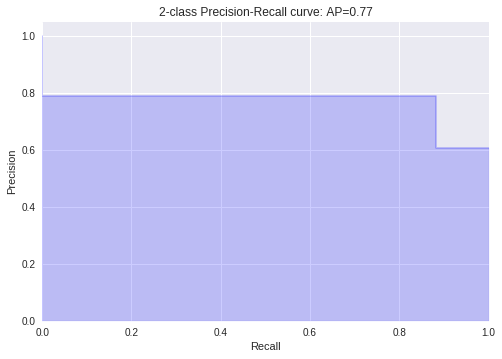

              precision    recall  f1-score   support

         Boy       0.79      0.88      0.83        17
        Girl       0.78      0.64      0.70        11

   micro avg       0.79      0.79      0.79        28
   macro avg       0.78      0.76      0.77        28
weighted avg       0.78      0.79      0.78        28



In [0]:
#結果圖像化
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test107, predicted_ans)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test107, predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#===================================================================
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))

labels = [1,-1]
targets_name = ['Boy','Girl']
print(metrics.classification_report(y_test107, predicted_ans,labels=labels,target_names = targets_name))

# SOMTE後的資料

Average precision-recall2 score: 0.79


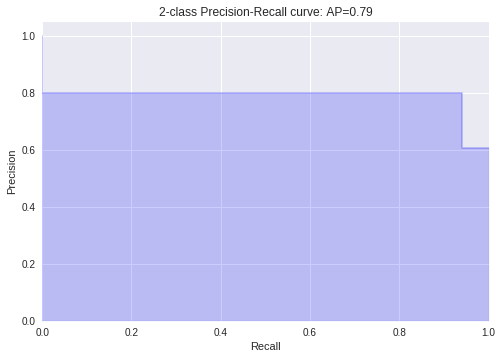

              precision    recall  f1-score   support

         Boy       0.80      0.94      0.86        17
        Girl       0.88      0.64      0.74        11

   micro avg       0.82      0.82      0.82        28
   macro avg       0.84      0.79      0.80        28
weighted avg       0.83      0.82      0.81        28



In [0]:
#結果圖像化
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test107, predicted_ans2)

print('Average precision-recall2 score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test107, predicted_ans2)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))

labels = [1,-1]
targets_name = ['Boy','Girl']
print(metrics.classification_report(y_test107, predicted_ans2,labels=labels,target_names = targets_name))

# oversampling

Average precision-recall score: 0.81


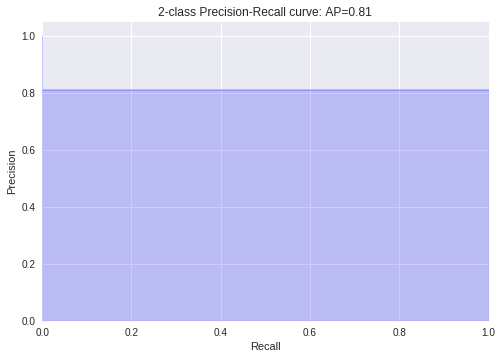

              precision    recall  f1-score   support

         Boy       0.81      1.00      0.89        17
        Girl       1.00      0.64      0.78        11

   micro avg       0.86      0.86      0.86        28
   macro avg       0.90      0.82      0.84        28
weighted avg       0.88      0.86      0.85        28



In [0]:
#結果圖像化
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test107, predicted_ans3)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test107, predicted_ans3)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#===================================================================
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))

labels = [1,-1]
targets_name = ['Boy','Girl']
print(metrics.classification_report(y_test107, predicted_ans3,labels=labels,target_names = targets_name))

# other algorithm

# OCSVM

In [0]:
import numpy as np
from sklearn import svm
cc=cleaned_df
nor_obs = cc.loc[cc.gender==1]    #Data frame with normal observation
ano_obs = cc.loc[cc.gender==-1] #Data frame with anomalous observation

train_feature = nor_obs

zzzz= train_feature.pop('gender')#看不懂為何drop
from sklearn import svm
oneclass = svm.OneClassSVM(kernel="linear", gamma=0.001, nu=0.95)
oneclass.fit(train_feature)

s_predicted_ans=oneclass.predict(X_test107)


# SVM initial

Average S_precision-recall score: 0.63


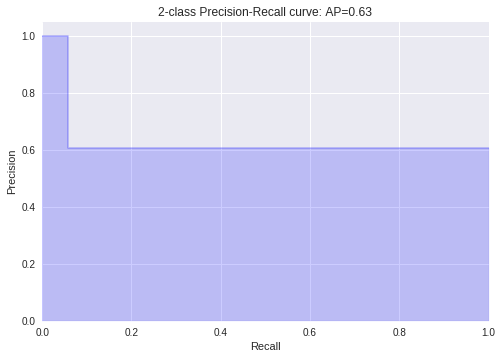

              precision    recall  f1-score   support

         Boy       1.00      0.06      0.11        17
        Girl       0.41      1.00      0.58        11

   micro avg       0.43      0.43      0.43        28
   macro avg       0.70      0.53      0.35        28
weighted avg       0.77      0.43      0.29        28



In [0]:

#結果圖像化
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test107, s_predicted_ans)

print('Average S_precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test107, s_predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#===================================================================
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))

labels = [1,-1]
targets_name = ['Boy','Girl']
print(metrics.classification_report(y_test107, s_predicted_ans,labels=labels,target_names = targets_name))

# smote for ocsvm(無法正常執行)


In [0]:
X2 =concat([X2_train, y2_train], axis=1)

In [0]:

nor_obs_s = cc_s.loc[cc_s.gender==1]    #Data frame with normal observation
ano_obs_s = cc_s.loc[cc_s.gender==-1] #Data frame with anomalous observation

train_feature_s = nor_obs_s

zzzz= train_feature_s.pop('gender')#看不懂為何drop
from sklearn import svm
oneclass = svm.OneClassSVM(kernel="linear", gamma=0.001, nu=0.95)
oneclass.fit(train_feature_s)


In [0]:

#nor_obs2 = cc2.loc[cc2.gender==1]    #Data frame with normal observation
#ano_obs2 = cc2.loc[cc2.gender==-1] #Data frame with anomalous observation
#sy_1 = nor_obs2.pop('gender')
#sy_2 = ano_obs2.pop('gender')
#sX_test_1 = nor_obs2
#sX_test_2 = ano_obs2
#sX_test = sX_test_1.append(sX_test_2)

ss_predicted_ans=oneclass.predict(X_test107)
#sy_test = sX_test.pop('gender')


In [0]:
#結果圖像化
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test107, ss_predicted_ans)

print('Average S_precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test107, ss_predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#===================================================================
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))

labels = [1,-1]
targets_name = ['Boy','Girl']
print(metrics.classification_report(y_test107, ss_predicted_ans,labels=labels,target_names = targets_name))

# oversample for svm(執行後結果與原始資料相同)


可能仍有要修改的地方

In [0]:
cc_up=upsample
upnor_obs = cc_up.loc[cc_up.gender==1]    #Data frame with normal observation
upano_obs = cc_up.loc[cc_up.gender==-1] #Data frame with anomalous observation

trainup_feature = upnor_obs

zzzz= trainup_feature.pop('gender')#看不懂為何drop
from sklearn import svm
oneclass2 = svm.OneClassSVM(kernel="linear", gamma=0.001, nu=0.95)
oneclass2.fit(trainup_feature)
sup_predicted_ans=oneclass2.predict(X_test107)

Average S_precision-recall score: 0.63


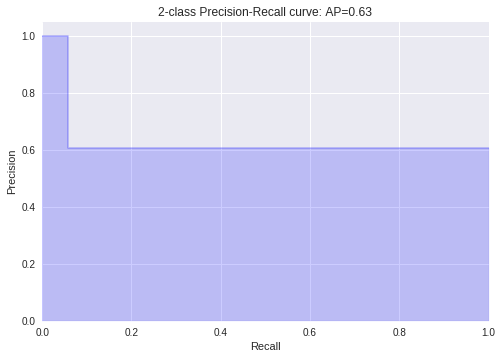

              precision    recall  f1-score   support

         Boy       1.00      0.06      0.11        17
        Girl       0.41      1.00      0.58        11

   micro avg       0.43      0.43      0.43        28
   macro avg       0.70      0.53      0.35        28
weighted avg       0.77      0.43      0.29        28



In [0]:
#結果圖像化
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test107, sup_predicted_ans)

print('Average S_precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test107, sup_predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#===================================================================
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))

labels = [1,-1]
targets_name = ['Boy','Girl']
print(metrics.classification_report(y_test107, sup_predicted_ans,labels=labels,target_names = targets_name))

# Randomforest

In [0]:
from sklearn.preprocessing import StandardScaler
XR_test=X_test107
XR2_test=X_test107
XR3_test=X_test107


In [0]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# 載入資料




sc = StandardScaler()  
#X_train = sc.fit_transform(X_train)  
#XR_test = sc.transform(XR_test)  

from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=120, random_state=2)  
regressor.fit(X_train, y_train)  
r_predicted_ans = regressor.predict(XR_test)  


oversample


In [0]:
#sc3 = StandardScaler()  
#X3_train = sc3.fit_transform(X3_train)  
#XR3_test = sc3.transform(XR3_test)  



regressor3 = RandomForestClassifier(n_estimators=120, random_state=2)  
regressor3.fit(X3_train, y3_train)  
r3_predicted_ans = regressor3.predict(XR3_test)  

In [0]:

#sc2 = StandardScaler()  
#X2_train = sc2.fit_transform(X2_train)  
#XR2_test = sc2.transform(XR2_test) 

from sklearn.ensemble import RandomForestClassifier

regressor2 = RandomForestClassifier(n_estimators=120, random_state=2)  
regressor2.fit(X2_train, y2_train)  
r2_predicted_ans = regressor2.predict(XR2_test)  

# inital

Average precision-recall score: 0.81


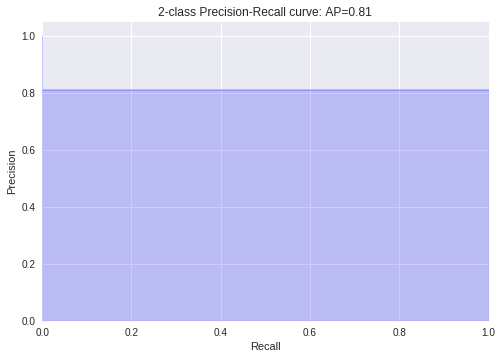

              precision    recall  f1-score   support

         Boy       0.81      1.00      0.89        17
        Girl       1.00      0.64      0.78        11

   micro avg       0.86      0.86      0.86        28
   macro avg       0.90      0.82      0.84        28
weighted avg       0.88      0.86      0.85        28



In [0]:
#結果圖像化#inital
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test107, r_predicted_ans)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test107, r_predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#===================================================================
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))

labels = [1,-1]
targets_name = ['Boy','Girl']
print(metrics.classification_report(y_test107, r_predicted_ans,labels=labels,target_names = targets_name))

# oversample


Average precision-recall score: 0.85


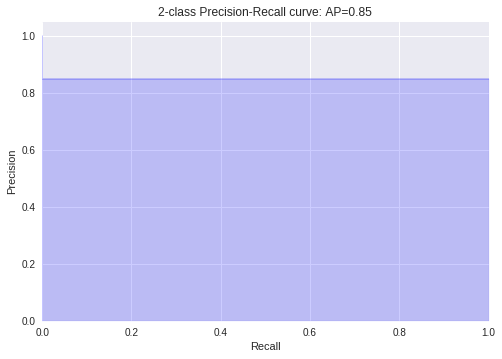

              precision    recall  f1-score   support

         Boy       0.85      1.00      0.92        17
        Girl       1.00      0.73      0.84        11

   micro avg       0.89      0.89      0.89        28
   macro avg       0.93      0.86      0.88        28
weighted avg       0.91      0.89      0.89        28



In [0]:
#結果圖像化
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test107, r3_predicted_ans)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test107, r3_predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#===================================================================
from sklearn import metrics

labels = [1,-1]
targets_name = ['Boy','Girl']
print(metrics.classification_report(y_test107, r3_predicted_ans,labels=labels,target_names = targets_name))

# SMOE

Average precision-recall score: 0.83


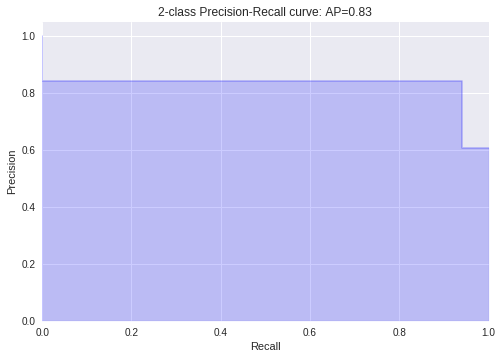

              precision    recall  f1-score   support

         Boy       0.84      0.94      0.89        17
        Girl       0.89      0.73      0.80        11

   micro avg       0.86      0.86      0.86        28
   macro avg       0.87      0.83      0.84        28
weighted avg       0.86      0.86      0.85        28



In [0]:
#結果圖像化
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test107, r2_predicted_ans)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test107, r2_predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#===================================================================
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))

labels = [1,-1]
targets_name = ['Boy','Girl']
print(metrics.classification_report(y_test107, r2_predicted_ans,labels=labels,target_names = targets_name))